Starting Iris Dataset Analysis:
K=2, SSE=152.35, Silhouette Score=0.68, ARI=0.54, Time=0.28s
K=3, SSE=78.85, Silhouette Score=0.55, ARI=0.73, Time=0.13s
K=4, SSE=57.23, Silhouette Score=0.50, ARI=0.65, Time=0.25s
K=5, SSE=46.45, Silhouette Score=0.49, ARI=0.61, Time=0.23s
K=6, SSE=39.04, Silhouette Score=0.36, ARI=0.45, Time=0.08s
K=7, SSE=34.47, Silhouette Score=0.35, ARI=0.47, Time=0.10s
K=8, SSE=30.19, Silhouette Score=0.36, ARI=0.46, Time=0.10s
K=9, SSE=28.29, Silhouette Score=0.34, ARI=0.42, Time=0.13s
K=10, SSE=26.55, Silhouette Score=0.30, ARI=0.36, Time=0.15s


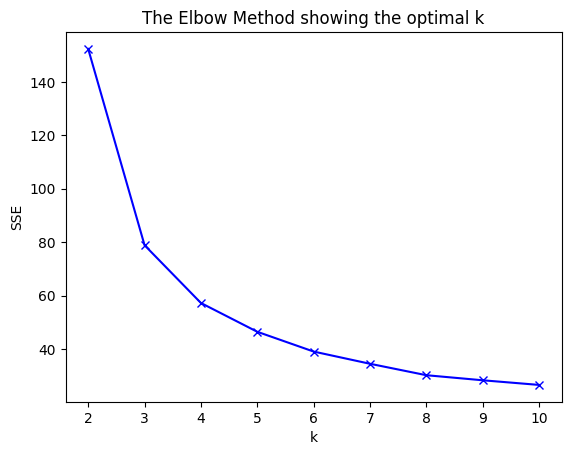

K-means (k=3): SSE=78.851441426146, Silhouette=0.5528190123564095, Time=0.08s
Hierarchical clustering with SciPy (ward linkage): Silhouette=0.5543236611296419, Time=0.00s


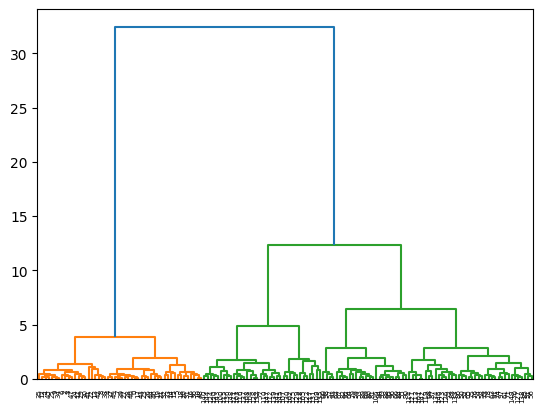

Agglomerative Clustering (n_clusters=3, linkage=ward): Silhouette=0.5543236611296419, Time=0.00s

Starting MNIST Dataset Subset Analysis:
K=2, SSE=3193592366.70, Silhouette Score=0.09, ARI=0.07, Time=2.36s
K=3, SSE=3039545149.04, Silhouette Score=0.06, ARI=0.15, Time=1.31s
K=4, SSE=2919162358.20, Silhouette Score=0.06, ARI=0.20, Time=1.40s
K=5, SSE=2814549166.59, Silhouette Score=0.06, ARI=0.32, Time=1.44s
K=6, SSE=2733150574.49, Silhouette Score=0.07, ARI=0.33, Time=1.26s
K=7, SSE=2678986355.24, Silhouette Score=0.06, ARI=0.33, Time=1.51s
K=8, SSE=2626661592.76, Silhouette Score=0.06, ARI=0.35, Time=1.32s
K=9, SSE=2580618063.52, Silhouette Score=0.07, ARI=0.32, Time=1.14s
K=10, SSE=2543692681.03, Silhouette Score=0.07, ARI=0.33, Time=2.63s


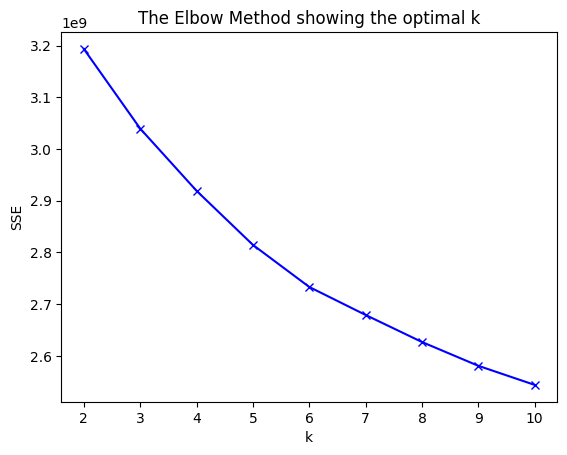

K-means (k=3): SSE=3039545149.0421343, Silhouette=0.056585901720271996, Time=1.48s
Hierarchical clustering with SciPy (ward linkage): Silhouette=0.04484043787065428, Time=0.23s


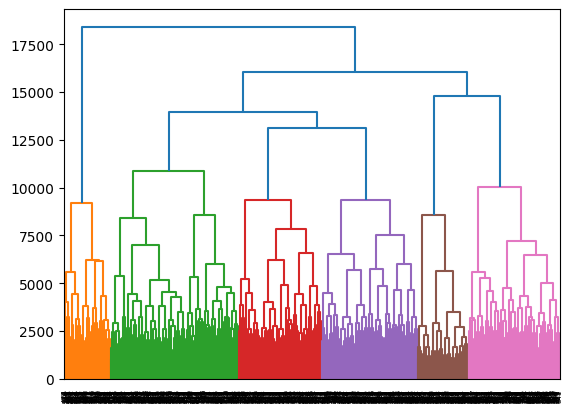

Agglomerative Clustering (n_clusters=3, linkage=ward): Silhouette=0.04484043787065428, Time=0.19s


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, adjusted_rand_score
import time

def load_iris_dataset():
    iris = load_iris()
    return iris.data, iris.target

def load_mnist_subset(size=1000, random_state=42):
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    data_subset, _, target_subset, _ = train_test_split(
        mnist.data, mnist.target, train_size=size, stratify=mnist.target, random_state=random_state)
    return data_subset, target_subset.astype(int)


def cluster_kmeans_performance(data, n_clusters=3, random_state=42):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(data)
    end_time = time.time()
    sse = kmeans.inertia_
    silhouette = silhouette_score(data, labels)
    print(f"K-means (k={n_clusters}): SSE={sse}, Silhouette={silhouette}, Time={(end_time - start_time):.2f}s")
    return labels

def cluster_hierarchical_scipy_performance(data, n_clusters=3, method='ward'):
    start_time = time.time()
    Z = linkage(data, method=method)
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    end_time = time.time()
    silhouette = silhouette_score(data, labels)
    print(f"Hierarchical clustering with SciPy ({method} linkage): Silhouette={silhouette}, Time={(end_time - start_time):.2f}s")
    dendrogram(Z)
    plt.show()
    return labels

def cluster_hierarchical_sklearn_performance(data, n_clusters=3, linkage='ward'):
    start_time = time.time()
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = model.fit_predict(data)
    end_time = time.time()
    silhouette = silhouette_score(data, labels)
    print(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage}): Silhouette={silhouette}, Time={(end_time - start_time):.2f}s")
    return labels

def elbow_method_performance(data, true_labels, start_k=2, end_k=11, random_state=42):
    sses = []
    silhouettes = []
    aris = []
    for k in range(start_k, end_k):
        start_time = time.time()
        kmeanModel = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = kmeanModel.fit_predict(data)
        end_time = time.time()
        sse = kmeanModel.inertia_
        silhouette = silhouette_score(data, labels)
        ari = adjusted_rand_score(true_labels, labels)
        sses.append(sse)
        silhouettes.append(silhouette)
        aris.append(ari)
        print(f"K={k}, SSE={sse:.2f}, Silhouette Score={silhouette:.2f}, ARI={ari:.2f}, Time={(end_time - start_time):.2f}s")

    plt.plot(range(start_k, end_k), sses, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()


if __name__ == "__main__":

    print("Starting Iris Dataset Analysis:")
    iris_data, iris_labels = load_iris_dataset()
    elbow_method_performance(iris_data, iris_labels)
    kmeans_labels = cluster_kmeans_performance(iris_data)
    hierarchical_labels = cluster_hierarchical_scipy_performance(iris_data)
    hierarchical_sklearn_labels = cluster_hierarchical_sklearn_performance(iris_data)


    print("\nStarting MNIST Dataset Subset Analysis:")
    mnist_data_subset, mnist_labels_subset = load_mnist_subset(size=1000)
    elbow_method_performance(mnist_data_subset, mnist_labels_subset)
    kmeans_labels_mnist = cluster_kmeans_performance(mnist_data_subset)
    hierarchical_labels_mnist = cluster_hierarchical_scipy_performance(mnist_data_subset)
    hierarchical_sklearn_labels_mnist = cluster_hierarchical_sklearn_performance(mnist_data_subset)
